# Marketing for Yandex

The following will showcase the different types of advertising used by Yandex.music and which one would be best time of the year to advertise. It will also analize if desktop or touch produces more revenue, during which time of the year, and which one should be pushed more by the marketing team for better revenue of next year.

In [1]:
#import the libraries necessaries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np

In [2]:
#Read all the libraries and assign them to a variable for easy access
visits_log = '/datasets/visits_log_us.csv'
orders_log = '/datasets/orders_log_us.csv'
costs_log = '/datasets/costs_us.csv'

The following code will clean the 'visits' dataset

In [3]:
#Read library visits
visits = pd.read_csv(visits_log)

In [4]:
#Print the information of the dataset
visits.info()
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   99696948200

In [5]:
#Change the datatpye of the start ts
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

Changed the datatype for 'Start Ts' and 'End Ts' as this column will be used later on to track the number of users per day, per week and per month.

In [6]:
#Check for any missing values in the dataset to be replaced or filled in
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

There are no null values in the dataset.

In [7]:
#check for duplicates in the dataset
print(visits.duplicated().sum())

0


There are no duplicate values in the dataset.

The following code will clean the 'orders' dataset.

In [8]:
#Read library visits
orders = pd.read_csv(orders_log)

In [9]:
#Print the information of the dataset
orders.info()
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [10]:
#Change the datatype of buy Ts 
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

Change the datatype of 'Buy Ts'

In [11]:
#Check for any missing values in the dataset to be replaced or filled in
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

There are no null values in the dataset.

In [12]:
#check for duplicates in the dataset
print(orders.duplicated().sum())

0


There are no duplicate values in the dataset.

The following code will clean the 'costs' dataset

In [13]:
#Read library costs
costs = pd.read_csv(costs_log)

In [14]:
#Print the information of the dataset
costs.info()
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


All the columns seem to be on the correct data type, therefor no changes need to be made.

In [15]:
#Check for any missing values in the dataset to be replaced or filled in
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

There are no null values in the dataset.

In [16]:
#check for duplicates in the dataset
print(costs.duplicated().sum())

0


There are no duplicate values in the dataset.

In [17]:
# Convert the relevant columns to datetime format
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Check the date ranges for each dataset
print(f"Visits data range: {visits['Start Ts'].min()} to {visits['Start Ts'].max()}")
print(f"Orders data range: {orders['Buy Ts'].min()} to {orders['Buy Ts'].max()}")
print(f"Costs data range: {costs['dt'].min()} to {costs['dt'].max()}")

Visits data range: 2017-06-01 00:01:00 to 2018-05-31 23:59:00
Orders data range: 2017-06-01 00:10:00 to 2018-06-01 00:02:00
Costs data range: 2017-06-01 00:00:00 to 2018-05-31 00:00:00


# Reports on Products

1. Number of Uses per Day/Week/Month

In [18]:
daily_users = visits.resample('D', on='Start Ts')['Uid'].nunique()
weekly_users = visits.resample('W', on='Start Ts')['Uid'].nunique()
monthly_users = visits.resample('M', on='Start Ts')['Uid'].nunique()

In [19]:
#find the average for each one of them
dau_average = daily_users.mean()
wau_average = weekly_users.mean()
mau_average = monthly_users.mean()

In [20]:
print(f'Daily Active Users (DAU) Average: {dau_average}')
print(f'Weekly Active Users (WAU) Average: {wau_average}')
print(f'Monthly Active Users (MAU) Average: {mau_average}')

Daily Active Users (DAU) Average: 905.5041095890411
Weekly Active Users (WAU) Average: 5716.245283018868
Monthly Active Users (MAU) Average: 23228.416666666668


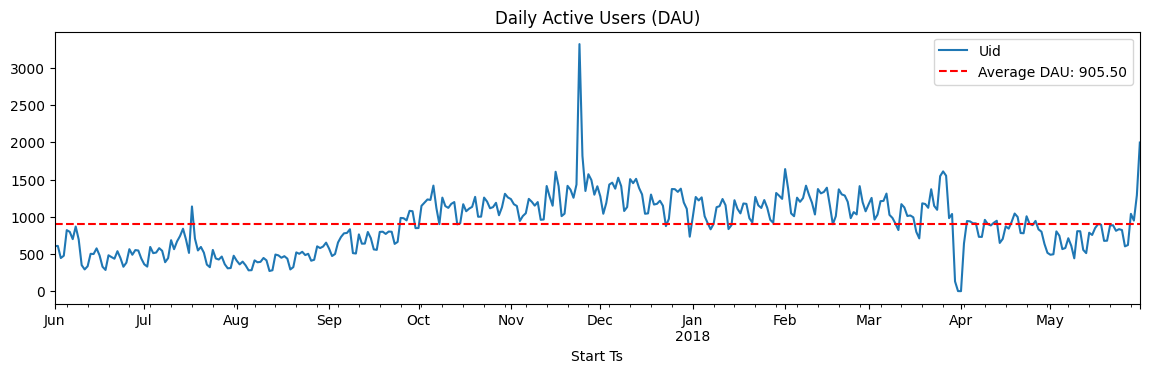

In [21]:
#DAU Chart
plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1)
daily_users.plot(title='Daily Active Users (DAU)')
plt.axhline(y=dau_average, color='r', linestyle='--', label=f'Average DAU: {dau_average:.2f}')
plt.legend()

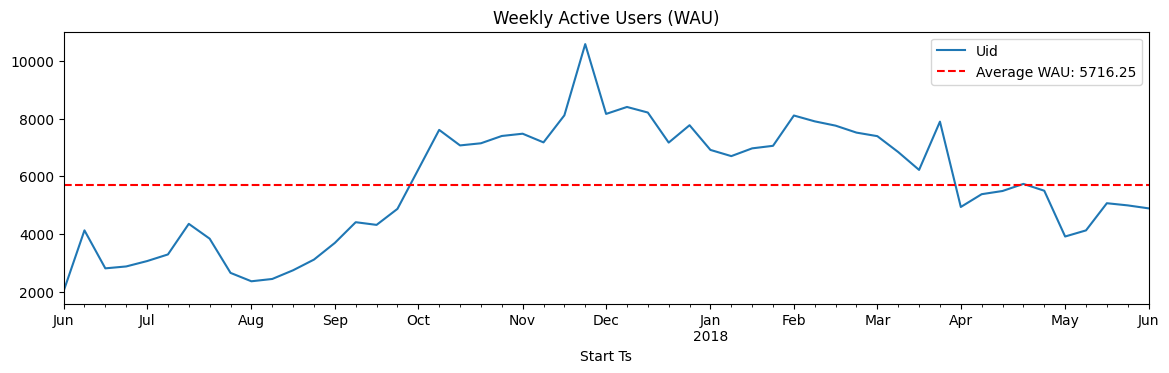

In [22]:
#WAU Chart
plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 1)
weekly_users.plot(title='Weekly Active Users (WAU)')
plt.axhline(y=wau_average, color='r', linestyle='--', label=f'Average WAU: {wau_average:.2f}')
plt.legend()

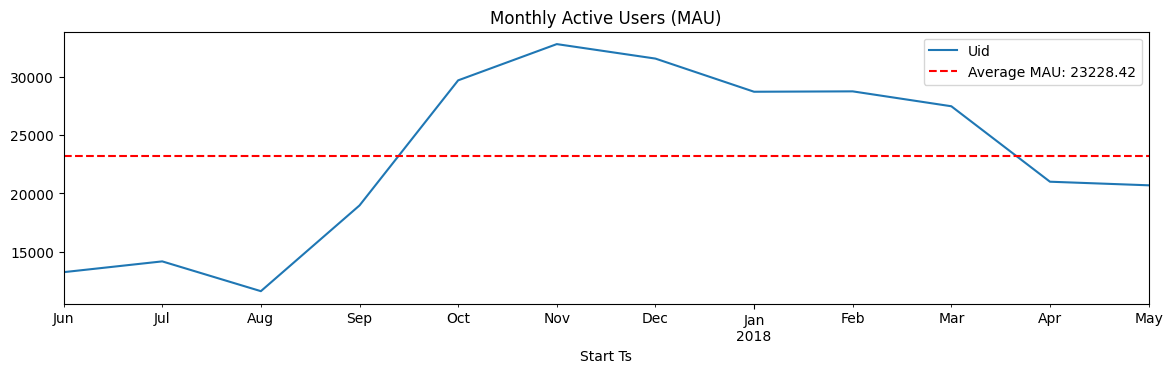

In [23]:
#MAU Chart
plt.figure(figsize=(14, 12))
plt.subplot(3, 1, 3)
monthly_users.plot(title='Monthly Active Users (MAU)')
plt.axhline(y=mau_average, color='r', linestyle='--', label=f'Average MAU: {mau_average:.2f}')
plt.legend()

Depending on the information we are looking for, we can find the number people using the service for DAU, WAU and MAU.

2. Sessions per Day

In [24]:
#Number of sessions per day (including the non unique ones)
daily_sessions = visits.resample('D', on='Start Ts').size()

daily_unique_users = visits.resample('D', on='Start Ts')['Uid'].nunique()

average_sessions_per_user = daily_sessions / daily_unique_users

average_sessions_per_user_overall = average_sessions_per_user.mean()

print("Daily Sessions (first 10 days):")
print(daily_sessions.head(10))
print("\nAverage Sessions Per User (first 10 days):")
print(average_sessions_per_user.head(10))
print(f"\nOverall Average Sessions Per User: {average_sessions_per_user_overall:.2f}")

Daily Sessions (first 10 days):
Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Freq: D, dtype: int64

Average Sessions Per User (first 10 days):
Start Ts
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
2017-06-06    1.097867
2017-06-07    1.127325
2017-06-08    1.081797
2017-06-09    1.086331
2017-06-10    1.071429
Freq: D, dtype: float64

Overall Average Sessions Per User: 1.08


In [25]:
#Size of chart
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

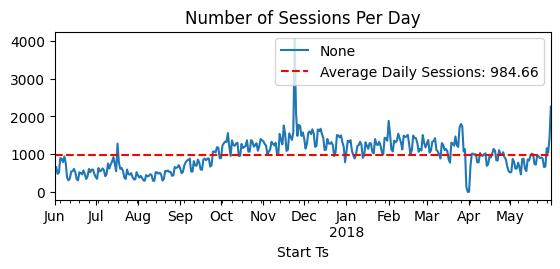

In [26]:
#Chart for daily sessions
plt.subplot(2, 1, 1)
daily_sessions.plot(title='Number of Sessions Per Day')
plt.axhline(y=daily_sessions.mean(), color='r', linestyle='--', label=f'Average Daily Sessions: {daily_sessions.mean():.2f}')
plt.legend()

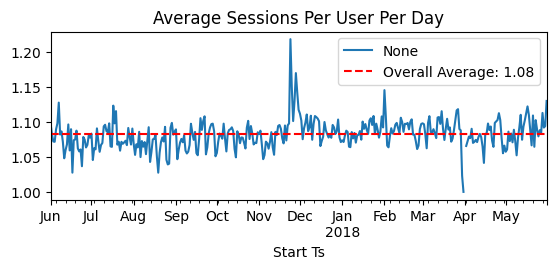

In [27]:
#Chart for average sessions per user chart
plt.subplot(2, 1, 2)
average_sessions_per_user.plot(title='Average Sessions Per User Per Day')
plt.axhline(y=average_sessions_per_user_overall, color='r', linestyle='--', label=f'Overall Average: {average_sessions_per_user_overall:.2f}')
plt.legend()

The number of sessions have increased compare to the number of people using the product, most likely due to people using the service more than once a day, or even more times.

3. Length of Each Session

In [28]:
#Sessions durations in minutes
visits['Session Duration'] = visits['End Ts'] - visits['Start Ts']

visits['Session Duration (minutes)'] = visits['Session Duration'].dt.total_seconds() / 60

session_duration_head = visits[['End Ts', 'Session Duration', 'Session Duration (minutes)']].head(10)

print(session_duration_head)

               End Ts Session Duration  Session Duration (minutes)
0 2017-12-20 17:38:00  0 days 00:18:00                        18.0
1 2018-02-19 17:21:00  0 days 00:28:00                        28.0
2 2017-07-01 01:54:00  0 days 00:00:00                         0.0
3 2018-05-20 11:23:00  0 days 00:24:00                        24.0
4 2017-12-27 14:06:00  0 days 00:00:00                         0.0
5 2017-09-03 21:36:00  0 days 00:01:00                         1.0
6 2018-01-30 12:09:00  0 days 00:56:00                        56.0
7 2017-11-05 15:15:00  0 days 00:01:00                         1.0
8 2017-07-19 10:44:00  0 days 00:03:00                         3.0
9 2017-11-08 13:43:00  0 days 00:01:00                         1.0


In [29]:
#Print out the median and mean
mean_duration = visits['Session Duration (minutes)'].mean()
median_duration = visits['Session Duration (minutes)'].median()

print(f"Mean Session Duration: {mean_duration:.2f} minutes")
print(f"Median Session Duration: {median_duration:.2f} minutes")

Mean Session Duration: 10.72 minutes
Median Session Duration: 5.00 minutes


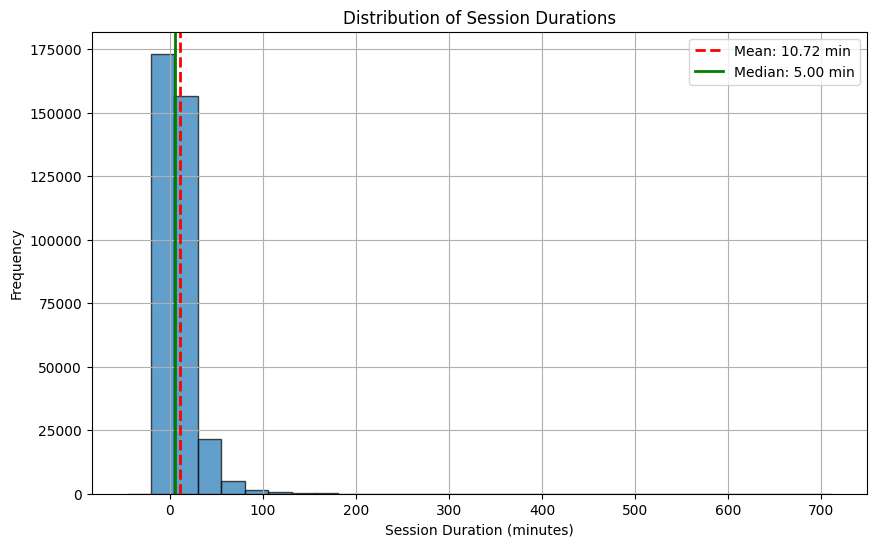

In [30]:
#Chart for sessions
plt.figure(figsize=(10, 6))
plt.hist(visits['Session Duration (minutes)'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(mean_duration, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.2f} min')
plt.axvline(median_duration, color='g', linestyle='-', linewidth=2, label=f'Median: {median_duration:.2f} min')
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

A new line was added to the dataset to be able to see the number of minutes each session lasted in minute.
Seems like the median is 5 minutes sessions and mean its around 11 minutes sessions.

4. User Retention Rate

In [31]:
# Ensure 'Start Ts' is in datetime format
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Create the cohort based on the user's first interaction (by month)
visits['Cohort Month'] = visits.groupby('Uid')['Start Ts'].transform('min').to_numpy().astype('datetime64[M]')
visits['Visit Month'] = visits['Start Ts'].to_numpy().astype('datetime64[M]')

visits['diff'] = ((visits['Visit Month'] - visits['Cohort Month'])/np.timedelta64(1, 'M'))
#df['nb_months'] = ((df.date2 - df.date1)/np.timedelta64(1, 'M'))

visits['diff'] = visits['diff'].astype(int)

In [32]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,Session Duration,Session Duration (minutes),Cohort Month,Visit Month,diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,0 days 00:18:00,18.0,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,0 days 00:28:00,28.0,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0 days 00:00:00,0.0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,0 days 00:24:00,24.0,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0 days 00:00:00,0.0,2017-12-01,2017-12-01,0


# Retention per month

In [33]:
#Ensure 'Start Ts' is in datetime format
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

#Create the cohort based on the user's first interaction (by month)
visits['Cohort Month'] = visits.groupby('Uid')['Start Ts'].transform('min').dt.to_period('M').dt.to_timestamp()
visits['Visit Month'] = visits['Start Ts'].dt.to_period('M').dt.to_timestamp()

#Calculate the difference in months
visits['diff'] = ((visits['Visit Month'] - visits['Cohort Month']) / np.timedelta64(1, 'M')).round().astype(int)

#Group by cohort month and visit month
grouped = visits.groupby(['Cohort Month', 'diff']).agg({'Uid': 'nunique'}).reset_index()

#Create a pivot table
cohort_counts = grouped.pivot(index='Cohort Month', columns='diff', values='Uid')

#Fill missing values with 0
cohort_counts = cohort_counts.fillna(0)

#Get the number of users in each cohort
cohort_sizes = cohort_counts.iloc[:, 0]

#Calculate retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0)

#Format the cohort month for better display
retention.index = retention.index.strftime('%Y-%m')

#Calculate average retention for each visit month
average_retention = retention.mean(axis=0)

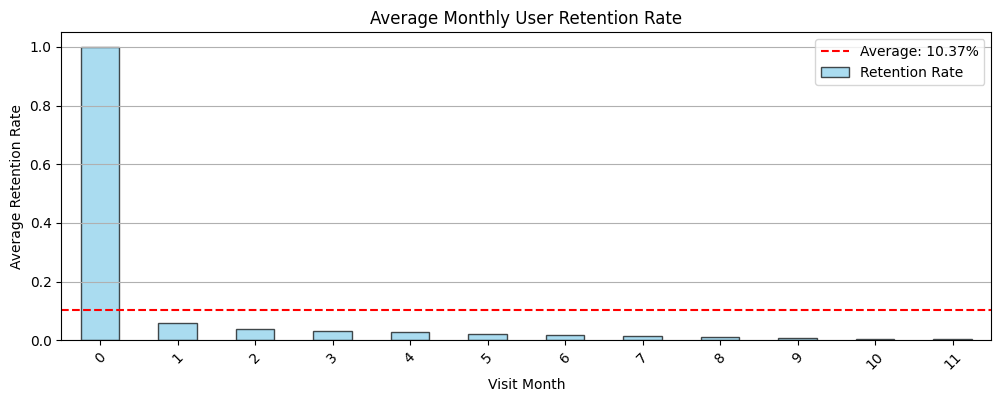

In [34]:
plt.figure(figsize=(12, 4))
average_retention.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7, label='Retention Rate')
plt.axhline(y=average_retention.mean(), color='r', linestyle='--', label=f'Average: {average_retention.mean():.2%}')
plt.title('Average Monthly User Retention Rate')
plt.xlabel('Visit Month')
plt.ylabel('Average Retention Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

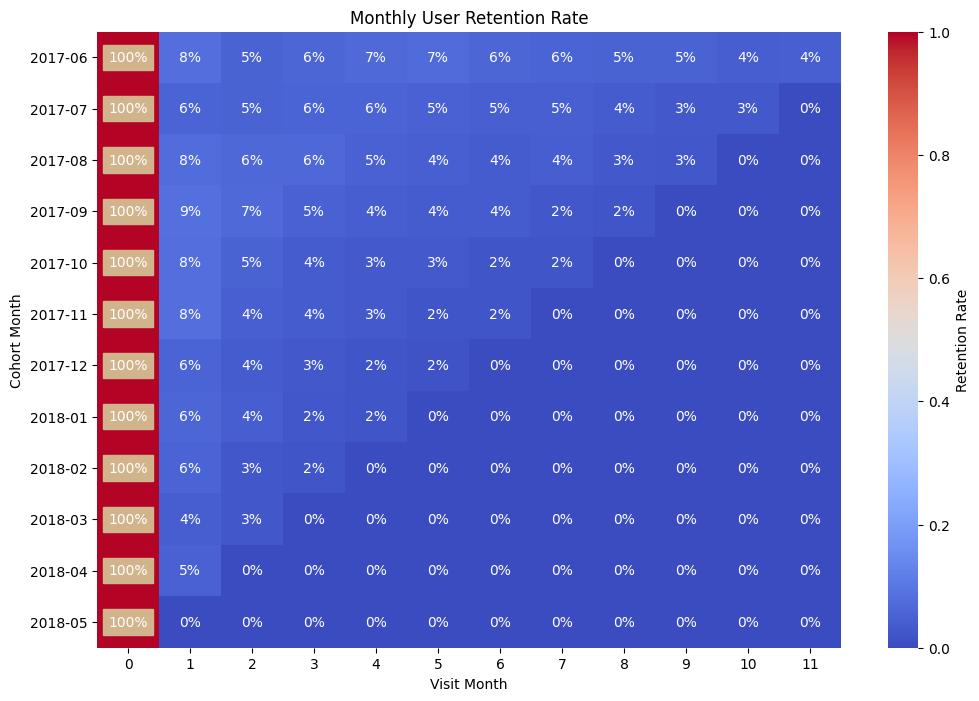

In [35]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(retention, annot=True, fmt=".0%", cmap="coolwarm", cbar_kws={'label': 'Retention Rate'})

for text in ax.texts:
    if text.get_text() == '100%':
        text.set_backgroundcolor('tan')

plt.title('Monthly User Retention Rate')
plt.xlabel('Visit Month')
plt.ylabel('Cohort Month')
plt.show()

All cohorts start with a 100% retention rate in the first month(month 0) due to this being when the users first interacted with the platform.
After the first month there doesn't seem to be a drop in retention rate.
Some cohorts, like those from June 2017, July 2017, and December 2017, show higher retentions rates compare to others when it comes to subsequenet months. 
It seems like almost all cohorts are low after time, if we look at the fourth or fifth month, the retention rates for most cohorts is below 10% and most of the other cohorts drop to 0%.
Overall it seems like less users stay in the platform after time.

The average retention rate is 10.97%.

# Sales

1. When people purchase

In [36]:
#Find all the names of the columns inside the orders dataset
print(orders.columns)

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


In [37]:
#Take a look at the dataset to make sure it all looks good and check column names
print(orders.head())

               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450


In [38]:
#calculate the first visit date for each user
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.rename(columns={'Start Ts': 'First Visit Ts'}, inplace=True)

#merge the first visit date with the order data
merged_df = pd.merge(orders, first_visits, on='Uid')

merged_df['Time to Buy (days)'] = (merged_df['Buy Ts'] - merged_df['First Visit Ts']).dt.days

result = merged_df[['Uid', 'Buy Ts', 'First Visit Ts', 'Time to Buy (days)']].sample(10)

print(result)

                        Uid              Buy Ts      First Visit Ts  \
2003    3006637934682960191 2017-06-06 13:41:00 2017-06-06 13:29:00   
17030   4638838845724198349 2017-10-17 21:18:00 2017-10-17 21:17:00   
46405  12554240459844158154 2018-04-23 12:53:00 2018-04-23 11:52:00   
36371  11171561711096037819 2018-02-18 15:21:00 2018-02-06 09:09:00   
32337  11317801396261534136 2018-01-09 14:21:00 2017-09-09 22:36:00   
17503   9245108256834495623 2017-10-20 22:31:00 2017-10-20 22:30:00   
30627   2512173588390028706 2017-12-28 22:55:00 2017-12-28 22:44:00   
13906    774976817171856731 2017-12-19 17:49:00 2017-09-18 11:27:00   
21682   8863483032631123016 2017-11-16 10:05:00 2017-11-16 09:56:00   
30555  12230869746524844910 2017-12-28 15:51:00 2017-12-28 15:25:00   

       Time to Buy (days)  
2003                    0  
17030                   0  
46405                   0  
36371                  12  
32337                 121  
17503                   0  
30627                 

In [39]:
#Aggregate the days into weekly intervals
merged_df['Time to Buy (weeks)'] = merged_df['Time to Buy (days)'] // 7

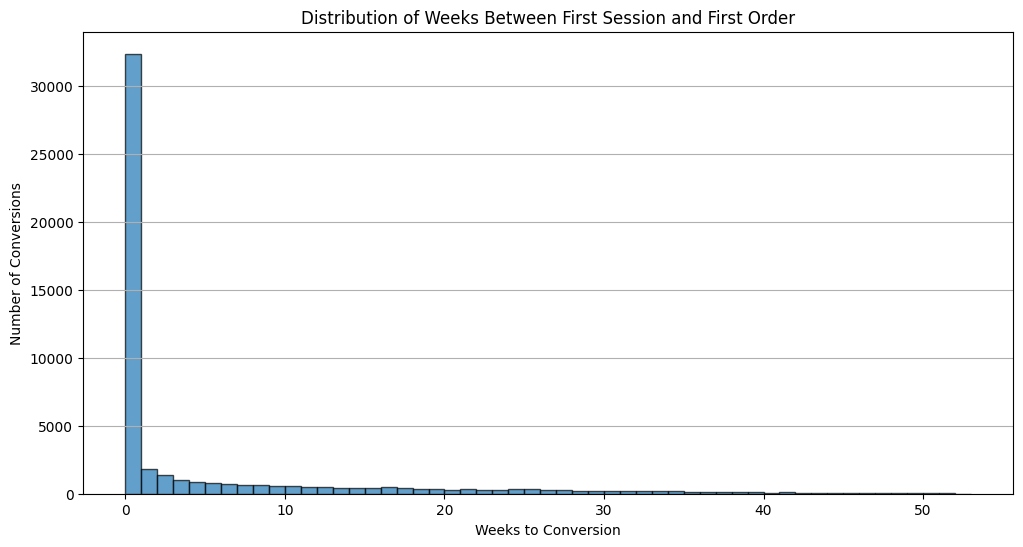

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(merged_df['Time to Buy (weeks)'], bins=range(merged_df['Time to Buy (weeks)'].max() + 2), edgecolor='k', alpha=0.7)
plt.title('Distribution of Weeks Between First Session and First Order')
plt.xlabel('Weeks to Conversion')
plt.ylabel('Number of Conversions')
plt.grid(axis='y')
plt.show()

It seems like most customers wait within a week to purchase the service of Yandex.music.

2. Number of orders

In [41]:
#New column for the order month
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M')

monthly_orders_per_buyer = orders.groupby(['Order Month', 'Uid']).size().reset_index(name='Order Count')

print(monthly_orders_per_buyer.head())

average_orders_per_buyer_per_month = monthly_orders_per_buyer.groupby('Order Month')['Order Count'].mean()

print(average_orders_per_buyer_per_month)

november_orders = orders[orders['Buy Ts'].dt.month == 11]

number_of_november_orders = november_orders.shape[0]

average_monthly_orders = average_orders_per_buyer_per_month.mean()

  Order Month                Uid  Order Count
0     2017-06   1575281904278712            2
1     2017-06  16233238570251706            1
2     2017-06  29085576454138824            1
3     2017-06  31782048561502182            1
4     2017-06  50884319066603964            1
Order Month
2017-06    1.163618
2017-07    1.191028
2017-08    1.227582
2017-09    1.231636
2017-10    1.214759
2017-11    1.244557
2017-12    1.258195
2018-01    1.211134
2018-02    1.240254
2018-03    1.273858
2018-04    1.192784
2018-05    1.226298
2018-06    1.000000
Freq: M, Name: Order Count, dtype: float64


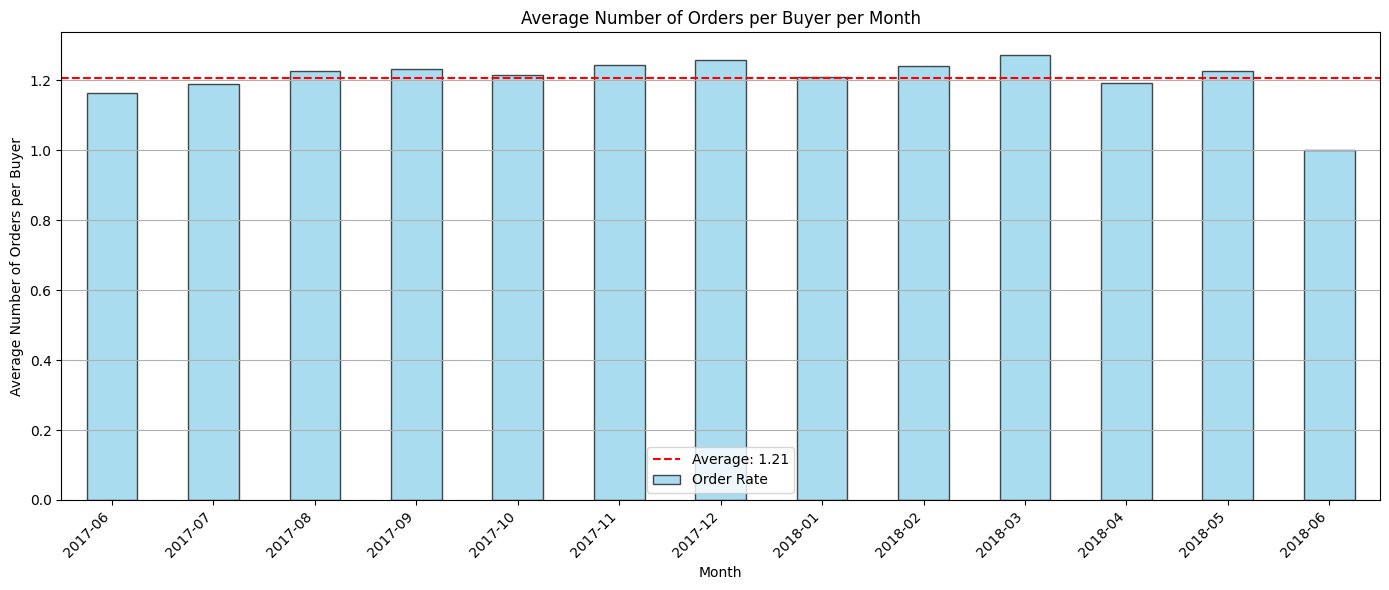

Number of orders in November: 5659
Average number of orders per buyer per month: 1.21


In [42]:
plt.figure(figsize=(14, 6))
average_orders_per_buyer_per_month.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7,  label='Order Rate')
plt.axhline(y=average_orders_per_buyer_per_month.mean(), color='r', linestyle='--', label=f'Average: {average_orders_per_buyer_per_month.mean():.2f}')
plt.title('Average Number of Orders per Buyer per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Orders per Buyer')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(average_orders_per_buyer_per_month.index.strftime('%Y-%m')))
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(f"Number of orders in November: {number_of_november_orders}")
print(f"Average number of orders per buyer per month: {average_monthly_orders:.2f}")

The average number per buyer per month tends to move up or down slightly, and only having a big drop after the month of june. The average number is 1.21 which lets us know that most customers only place one order per month and rarely others place 2 orders.

In [43]:
# Ensure 'Buy Ts' is in datetime format
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Add a new column for the order month
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M')

# Calculate the number of orders for each month
monthly_orders = orders.groupby('Order Month').size()

# Calculate the average number of orders per month
average_monthly_orders = monthly_orders.mean()

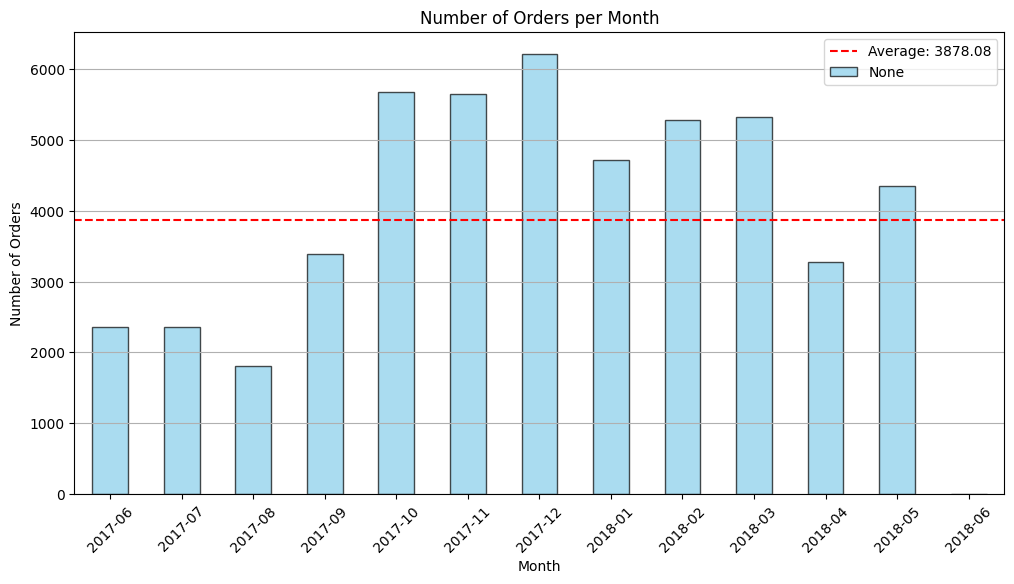

In [44]:
#Chart for the averager number of orders for each month
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.axhline(y=average_monthly_orders, color='r', linestyle='--', label=f'Average: {average_monthly_orders:.2f}')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

The average number of orders per month is 3878 which might seem like a big number but could be better and its only brought up by those month in which they cross the line as shown on the graph.

# last past worked on

3. Average purchase size

In [45]:
#Find out the average number of orders per customer
orders['Revenue'] = pd.to_numeric(orders['Revenue'], errors='coerce')

average_purchase_size = orders['Revenue'].mean()

print(average_purchase_size)

4.999646930477041


It seems like the average purchase size is almost 5 per customer which is really good. It might all come down to the amount/value of the purchase.

4. Revenue this brings in

In [46]:
#Ensure 'Buy Ts' is in datetime format
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

#Create the cohort based on the user's first purchase (by month)
orders['Cohort Month'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M').dt.to_timestamp()
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M').dt.to_timestamp()

#Calculate the difference in months
orders['Months Since Cohort'] = ((orders['Order Month'] - orders['Cohort Month']) / np.timedelta64(1, 'M')).astype(int)

#Group by cohort month and order month to calculate the sum of revenue and the count of unique users
cohort_data = orders.groupby(['Cohort Month', 'Months Since Cohort']).agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()

#Create a pivot table for revenue
cohort_pivot = cohort_data.pivot_table(index='Cohort Month', columns='Months Since Cohort', values='Revenue', fill_value=0)

#Calculate the cumulative sum of revenue for each cohort over the months
cohort_cumulative = cohort_pivot.cumsum(axis=1)

#Get the cohort sizes
cohort_sizes = orders.groupby('Cohort Month')['Uid'].nunique()

#Calculate the LTV by dividing the cumulative revenue by the cohort sizes
ltv_cohort = cohort_cumulative.divide(cohort_sizes, axis=0)

#Replace repeated values with zeros
ltv_cohort_masked = ltv_cohort.copy()
for index, row in ltv_cohort.iterrows():
    for i in range(1, len(row)):
        if row[i] == row[i-1]:
            ltv_cohort_masked.at[index, i] = 0

# Format the index for better readability in the heatmap
ltv_cohort_masked.index = ltv_cohort_masked.index.strftime('%Y-%m')

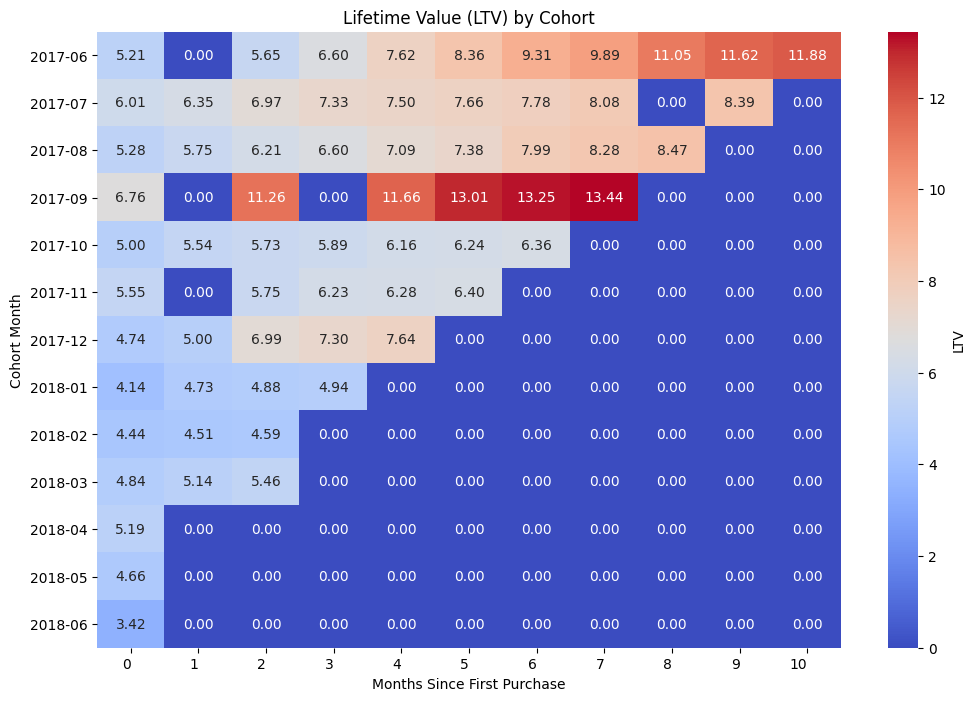

In [47]:
#Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cohort_masked, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'LTV'})
plt.title('Lifetime Value (LTV) by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.xticks(rotation=0, ha='right')
plt.show()

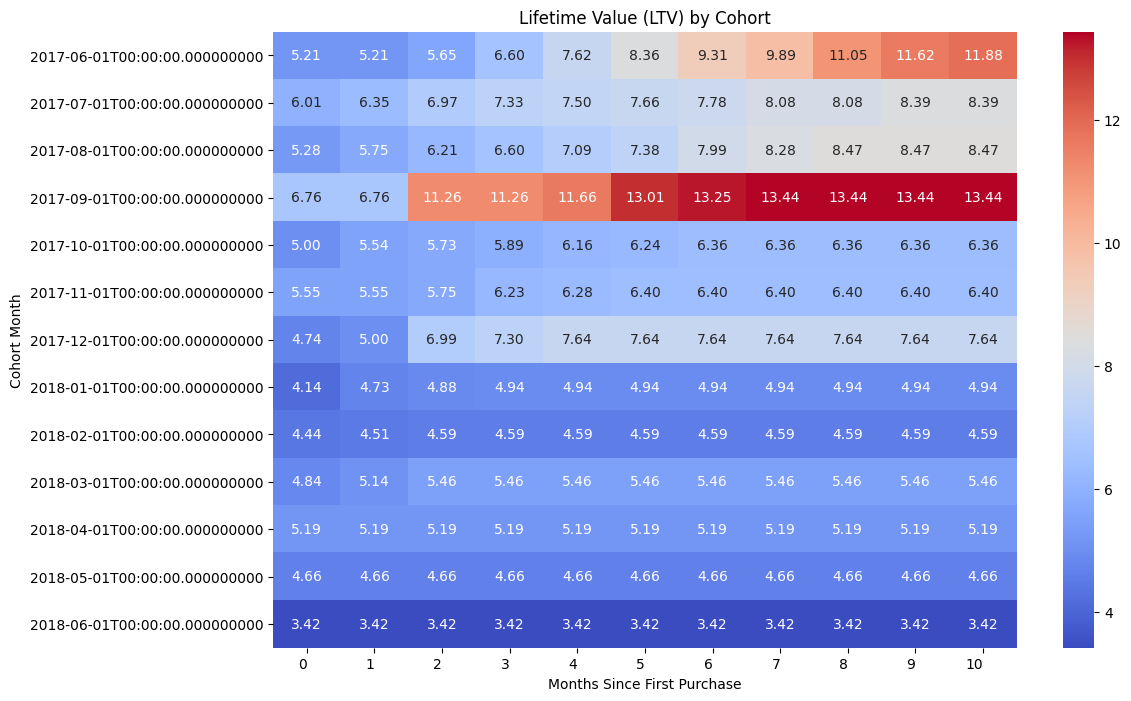

In [48]:
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cohort, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Lifetime Value (LTV) by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.xticks(rotation=0, ha='right')
plt.show()

It seems like the each cohort has a relative high LTV in the first month. Which indicates that users tend to spend the most in their first month of engagement. After the initial spike, the LTV tends to decrease over subsequent months. This decay suggests that the user spending decreases over time after their first purchase.

# Marketing

1. Money spent

In [49]:
#Find the name of the colums
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [50]:
#Cost of advertising
costs['costs'] = pd.to_numeric(costs['costs'], errors='coerce')

total_costs = costs['costs'].sum()

print(f"Total Costs: ${total_costs:.2f}")

Total Costs: $329131.62


The total cost of the advertising is greater than the revenue. This could be a bad thing.

2. Acquisition cost per source

In [51]:
print(costs.head())

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


In [52]:
#Find the total cost for each source
total_costs_by_source = costs.groupby('source_id')['costs'].sum()

print("Total Costs by Source:")

print(total_costs_by_source)

Total Costs by Source:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [53]:
#Cost of advertising
costs['costs'] = pd.to_numeric(costs['costs'], errors='coerce')

total_costs = costs['costs'].sum()

print(f"Total Costs: ${total_costs:.2f}")

Total Costs: $329131.62


In [54]:
#Number of acquisitions from each source
acquisitions_by_source = costs.groupby('source_id')['costs'].nunique()

mean_cac_by_source = total_costs_by_source / acquisitions_by_source

print("Mean Customer Acquisition Cost (CAC) by Source:")

print(mean_cac_by_source)

daily_costs = costs.groupby(['dt', 'source_id'])['costs'].sum().unstack(fill_value=0)

Mean Customer Acquisition Cost (CAC) by Source:
source_id
1      58.851045
2     119.904874
3     390.391243
4     168.711602
5     143.769722
9      16.085977
10     16.779510
Name: costs, dtype: float64


In [55]:
print(costs.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


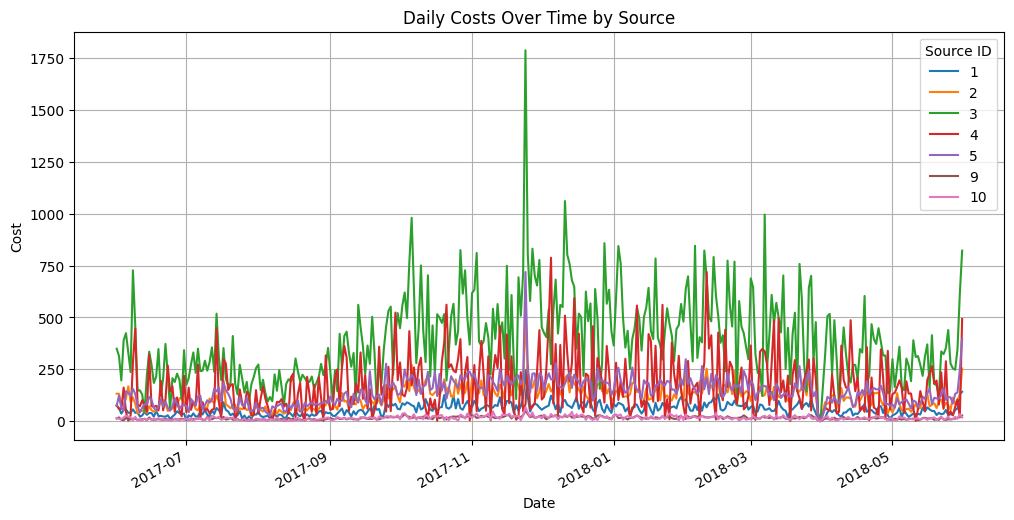

In [56]:
#Plot the daily cots over time for each source
plt.figure(figsize=(12, 6))
daily_costs.plot(ax=plt.gca())
plt.title('Daily Costs Over Time by Source')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend(title='Source ID')
plt.grid(True)
plt.show()

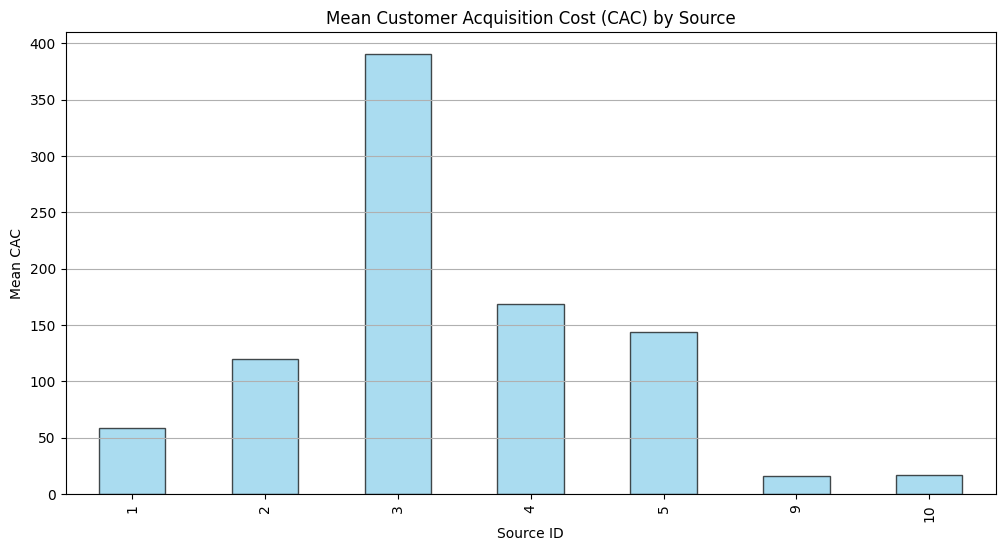

In [57]:
#Plot the mean CAC by source
plt.figure(figsize=(12, 6))
mean_cac_by_source.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Mean Customer Acquisition Cost (CAC) by Source')
plt.xlabel('Source ID')
plt.ylabel('Mean CAC')
plt.grid(axis='y')
plt.show()

It seems like cost for the 3rd source increased after the month of September all the way until April. Could be a seasonal thing. 

The cost for each acquisition variates from different values depending on the source.
To be more specific. Making the 3rd source the highest per customer.

Total cost of all sources are: $329,131.62

3. ROI (Return on investment)

In [58]:
# Ensure datetime formats
costs['dt'] = pd.to_datetime(costs['dt'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Create 'Cohort Month' and 'Order Month' columns
orders['Cohort Month'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M').dt.to_timestamp()
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M').dt.to_timestamp()
costs['month_year'] = costs['dt'].dt.to_period('M').dt.to_timestamp()

# Group costs by month_year
monthly_costs = costs.groupby('month_year')['costs'].sum().reset_index()

# Calculate the difference in months since cohort
orders['Months Since Cohort'] = ((orders['Order Month'] - orders['Cohort Month']) / np.timedelta64(1, 'M')).astype(int)

# Group revenue by cohort month and months since cohort
cohort_revenue = orders.groupby(['Cohort Month', 'Months Since Cohort']).agg({'Revenue': 'sum'}).reset_index()

# Merge costs with cohort revenue
cohort_revenue = cohort_revenue.rename(columns={'Cohort Month': 'month_year'})
cohort_data = pd.merge(cohort_revenue, monthly_costs, on='month_year', how='left')

# Fill NaN values in costs to avoid issues in calculations
cohort_data['costs'].fillna(0, inplace=True)

# Calculate ROI for each cohort over time
cohort_data['ROI'] = np.where(cohort_data['costs'] != 0, ((cohort_data['Revenue'] - cohort_data['costs']) / cohort_data['costs']) * 100, 0)

# Create a pivot table for the heatmap
cohort_pivot = cohort_data.pivot_table(index='month_year', columns='Months Since Cohort', values='ROI', fill_value=0)

# Format the 'month_year' index to remove time component
cohort_pivot.index = cohort_pivot.index.strftime('%Y-%m')

# Define a diverging color palette for better contrast of positive and negative values
cmap = sns.diverging_palette(220, 20, as_cmap=True)

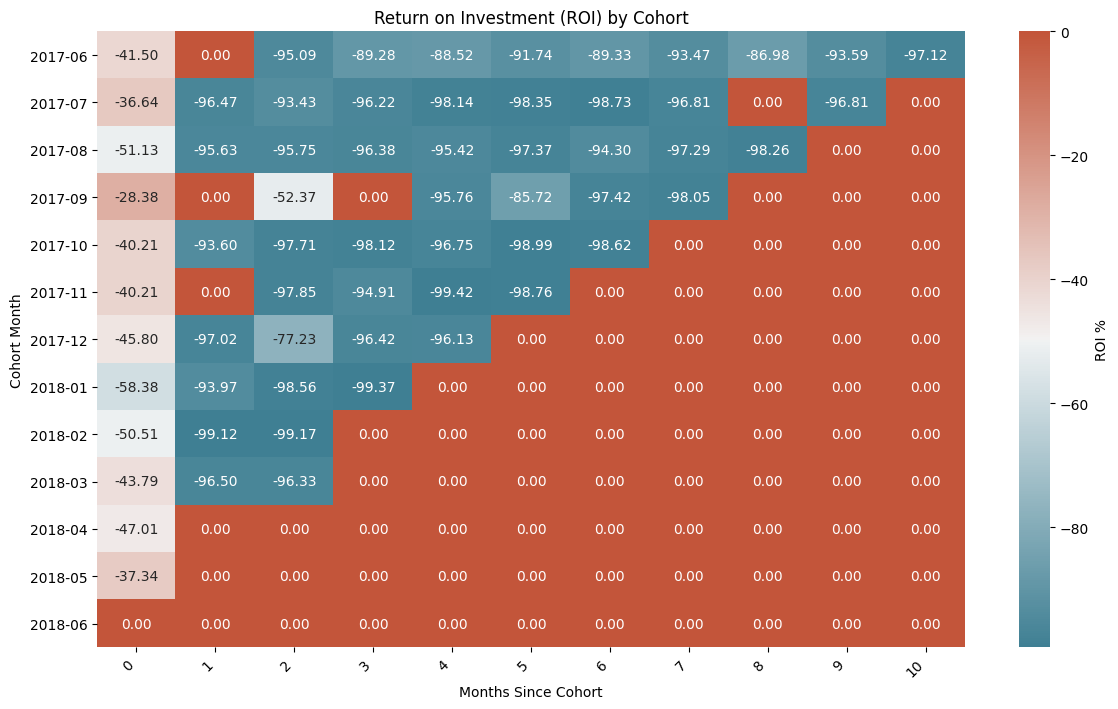

In [59]:
# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'label': 'ROI %'})
plt.title('Return on Investment (ROI) by Cohort')
plt.xlabel('Months Since Cohort')
plt.ylabel('Cohort Month')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

According to our heatmap, which makes it very clear how the ROI changes over time, December and March being the two closes months to breaking even with the total cost of operations for the company.

In [60]:
# Aggregate costs by month and source_id
costs['month'] = costs['dt'].dt.to_period('M')
costs_monthly_aggregated = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()

# Convert 'month' back to datetime for plotting
costs_monthly_aggregated['month'] = costs_monthly_aggregated['month'].dt.to_timestamp()

print(costs_monthly_aggregated.head())

       month  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12


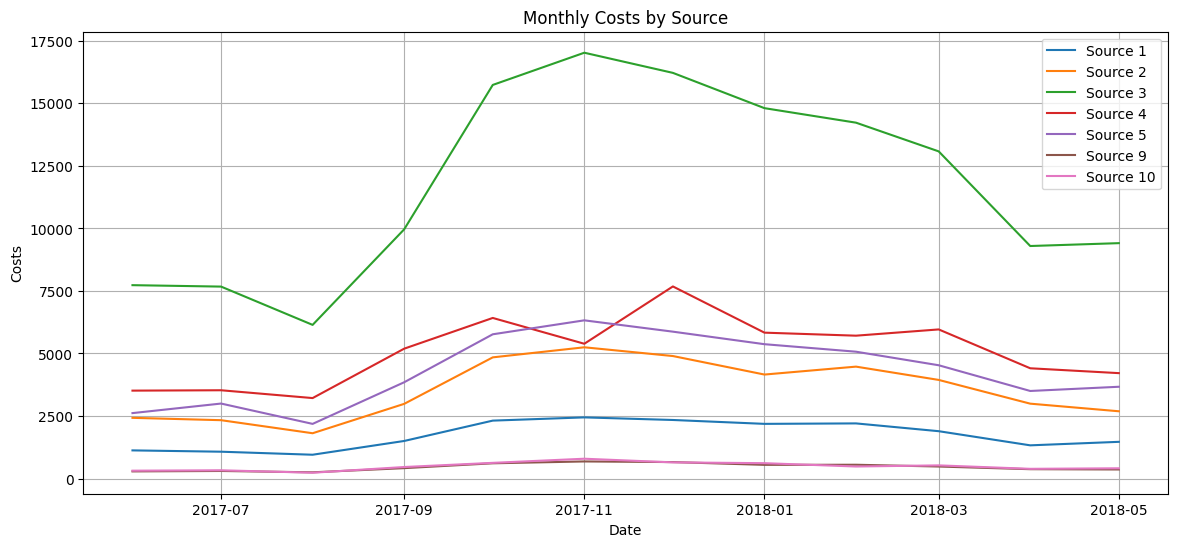

In [61]:
#Plot cost by source
plt.figure(figsize=(14, 6))
for source in costs_monthly_aggregated['source_id'].unique():
    subset = costs_monthly_aggregated[costs_monthly_aggregated['source_id'] == source]
    plt.plot(subset['month'], subset['costs'], label=f'Source {source}')
plt.title('Monthly Costs by Source')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.legend()
plt.grid(True)
plt.show()

The previous graph gives us a better understanding visually of the monthly cost of each source.

In [62]:
# Aggregate revenue and order counts by month
orders['month'] = orders['Buy Ts'].dt.to_period('M')
orders_aggregated = orders.groupby('month').agg({'Revenue': 'sum', 'Uid': 'count'}).reset_index()
orders_aggregated.rename(columns={'Uid': 'Orders'}, inplace=True)

# Convert 'month' back to datetime for plotting
orders_aggregated['month'] = orders_aggregated['month'].dt.to_timestamp()

print(orders_aggregated.head())

       month   Revenue  Orders
0 2017-06-01   9557.49    2354
1 2017-07-01  12539.47    2363
2 2017-08-01   8758.78    1807
3 2017-09-01  18345.51    3387
4 2017-10-01  27987.70    5679


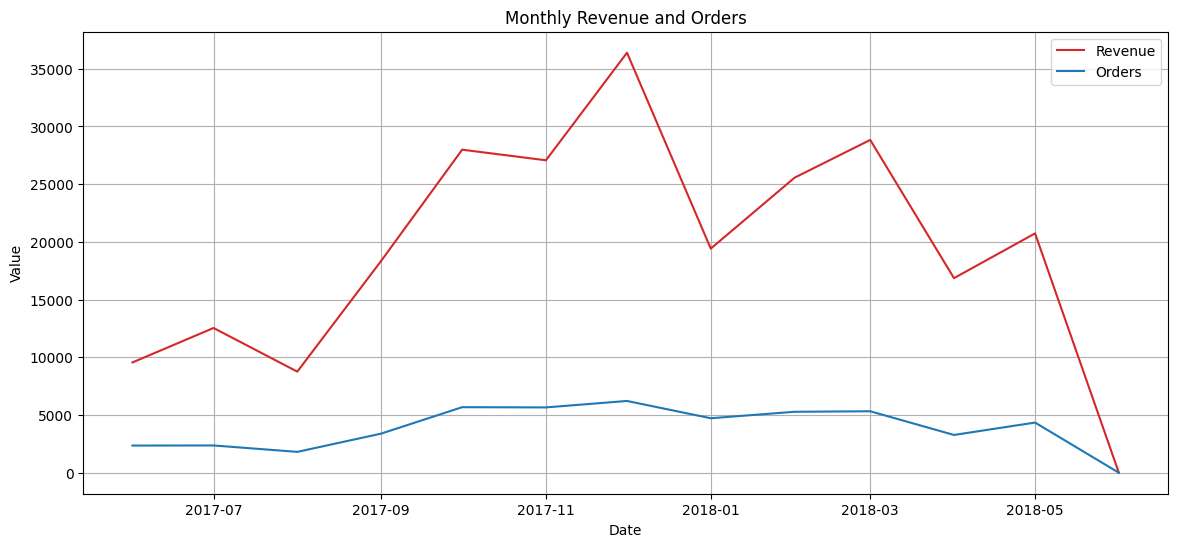

In [63]:
#Plot revenue and orders
plt.figure(figsize=(14, 6))
plt.plot(orders_aggregated['month'], orders_aggregated['Revenue'], label='Revenue', color='tab:red')
plt.plot(orders_aggregated['month'], orders_aggregated['Orders'], label='Orders', color='tab:blue')
plt.title('Monthly Revenue and Orders')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Over time there is an increase in revenue, after september there is a huge climb increased, which dropped very slightly during november to only reach a higher level during december. To suddenly drop.

In [64]:
# Create the cohort based on the user's first interaction (by month)
orders['Cohort Month'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M').dt.to_timestamp()
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M').dt.to_timestamp()

# Calculate the difference in months
orders['diff'] = ((orders['Order Month'] - orders['Cohort Month']) / np.timedelta64(1, 'M')).astype(int)

# Group by cohort month and diff to calculate the total revenue and number of orders
grouped = orders.groupby(['Cohort Month', 'diff']).agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()
grouped.rename(columns={'Uid': 'Orders'}, inplace=True)

# Create pivot tables for revenue and orders
cohort_revenue = grouped.pivot(index='Cohort Month', columns='diff', values='Revenue').fillna(0)
cohort_orders = grouped.pivot(index='Cohort Month', columns='diff', values='Orders').fillna(0)

# Format the cohort month for better display
cohort_revenue.index = cohort_revenue.index.strftime('%Y-%m')
cohort_orders.index = cohort_orders.index.strftime('%Y-%m')

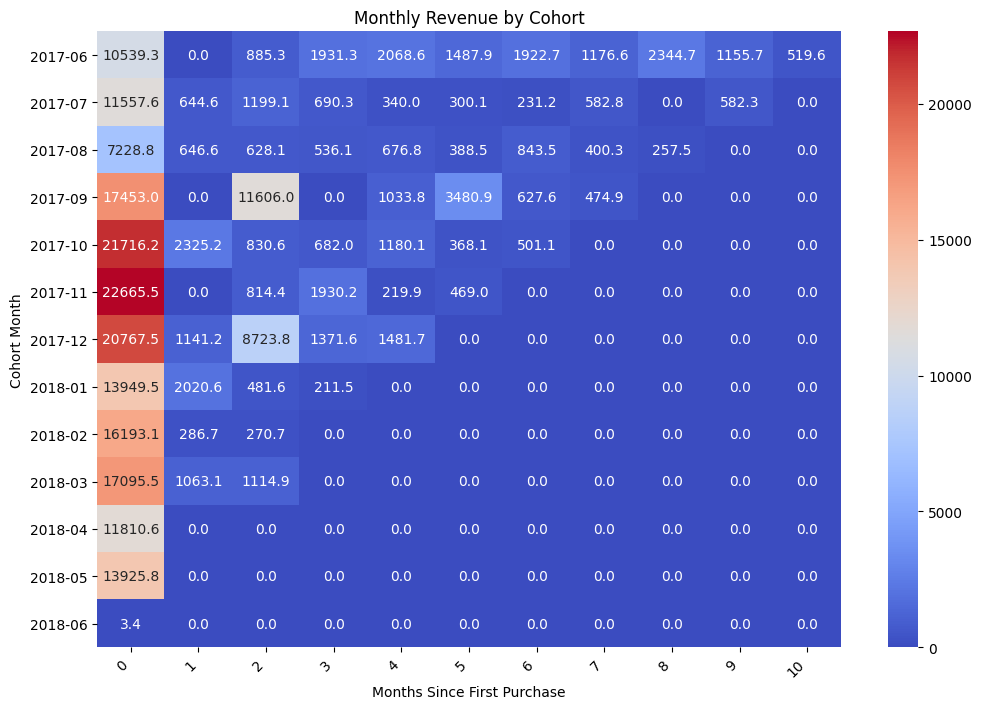

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_revenue, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Monthly Revenue by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.xticks(rotation=45, ha='right')
plt.show()

On the first month, the revenue generated reach 10,539 dollars. After this there is a noticeable drop in revenue for most cohorts, after the seconds month, some cohorts see a sudden spike reaching almost their initial month. There seems to be not much consistency on the months or a clear spike up or down. On the month of november 2017 a cohort generated 814 dollars on the second month, it generated 1930 dollars. There is a clear up from here, but on the 3rd month it drops to 469 dollars.

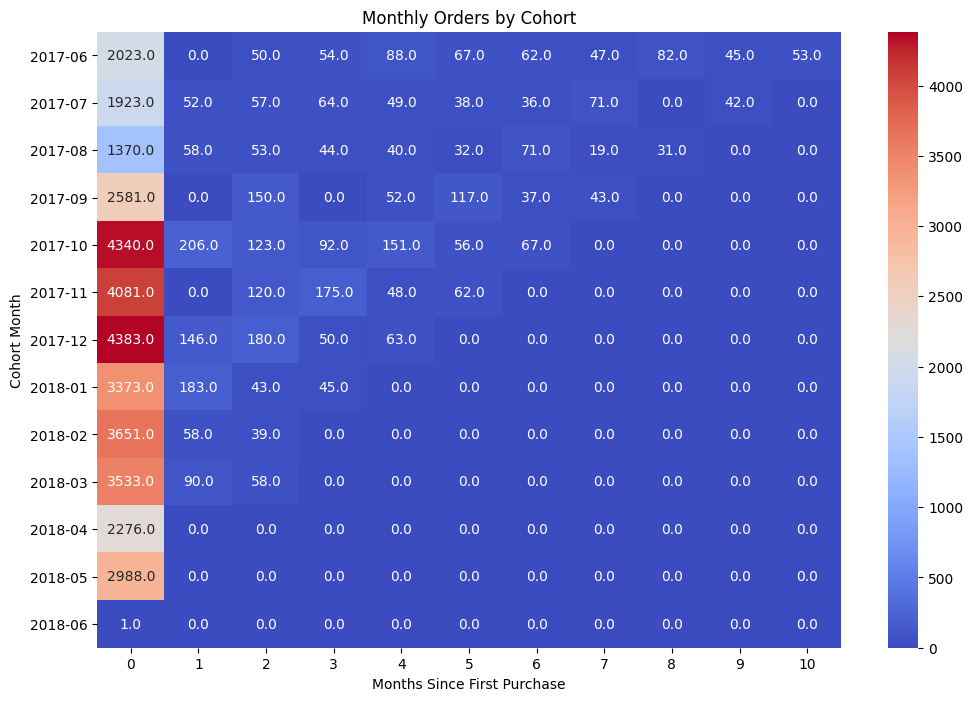

In [66]:
#Plot heatmap for orders
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_orders, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Monthly Orders by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

On the first month we see a lot of orders placed as this is when the platform first was open, after the first month we see constant order placing. Which tends to decrease over time. Most cohorts drop in the amount of order but some of them have random spikes for example September 2017 with 150 orders on their second month. Other months we see a small decline even thought orders are being placed, for instance October 2017 we see 206 orders in the first month, followed by 123 in the second month and 92 in the third month.

# Graphs for a better metrics understanding

In [67]:
# Add a new column for the month
visits['month'] = visits['Start Ts'].dt.to_period('M')

# Aggregate visits by month, device, and source
visits_aggregated = visits.groupby(['month', 'Device', 'Source Id']).size().reset_index(name='Visits')

# Convert 'month' back to datetime for plotting
visits_aggregated['month'] = visits_aggregated['month'].dt.to_timestamp()

print(visits_aggregated.head())

# Example device and source to filter
device_example = 'desktop'
source_example = 2

# Filter the data for the specified device and source
visits_subset = visits_aggregated[(visits_aggregated['Device'] == device_example) & (visits_aggregated['Source Id'] == source_example)]

       month   Device  Source Id  Visits
0 2017-06-01  desktop          1    1228
1 2017-06-01  desktop          2    1682
2 2017-06-01  desktop          3    3511
3 2017-06-01  desktop          4    2710
4 2017-06-01  desktop          5    2255


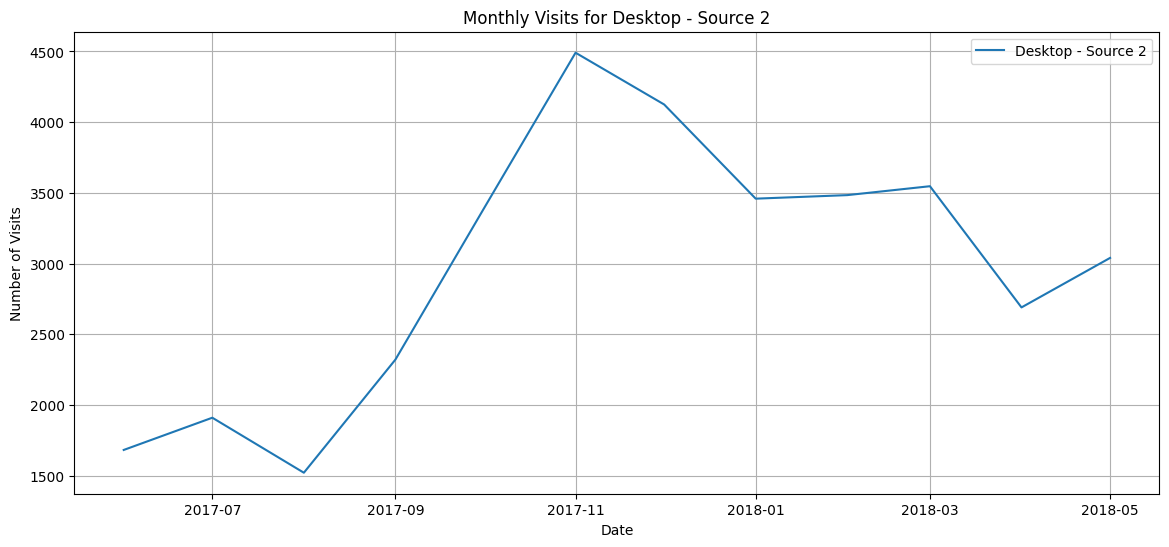

In [68]:
#plot visits for desktop and source over time

# Plot visits over time for the specified device and source
plt.figure(figsize=(14, 6))
plt.plot(visits_subset['month'], visits_subset['Visits'], label=f'{device_example.capitalize()} - Source {source_example}')
plt.title(f'Monthly Visits for {device_example.capitalize()} - Source {source_example}')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

# Example device and source to filter for touch
device_example = 'touch'
source_example = 2

In general the month of december seem to be one of the months in which more people pay for the services on desktop.

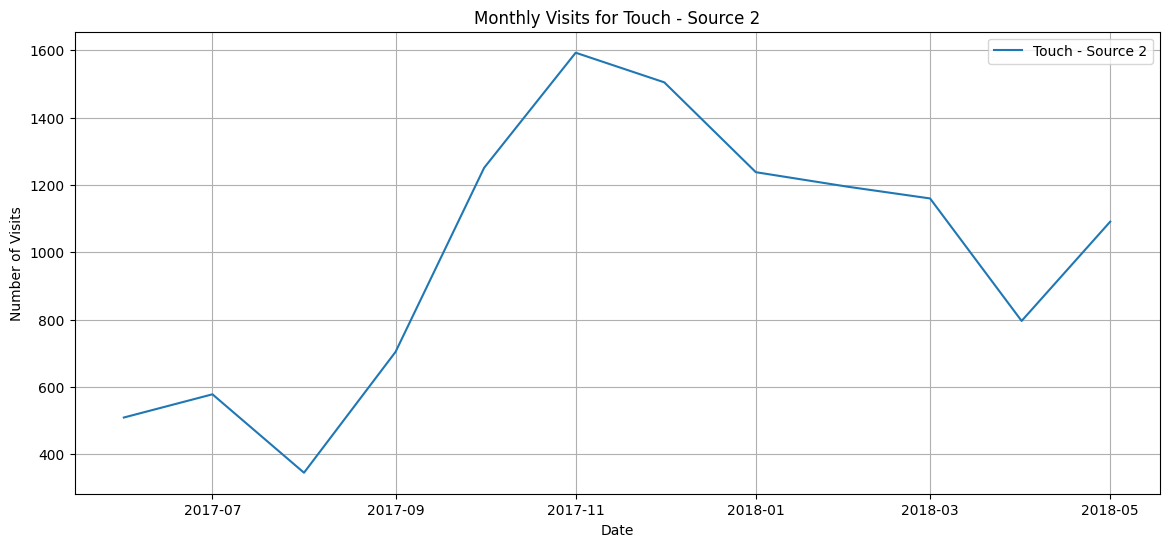

In [69]:
device_example = 'touch'
source_example = 2

# Filter the data for the specified device and source
visits_subset_touch = visits_aggregated[(visits_aggregated['Device'] == device_example) & (visits_aggregated['Source Id'] == source_example)]

# Plot visits over time for the specified device and source
plt.figure(figsize=(14, 6))
plt.plot(visits_subset_touch['month'], visits_subset_touch['Visits'], label=f'{device_example.capitalize()} - Source {source_example}')
plt.title(f'Monthly Visits for {device_example.capitalize()} - Source {source_example}')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

In touch devices such as phones, ipad and others. The month of december is also a high demand for the service this could be due to gifts or present being given for christmas.

In [70]:
source_example = 2
device_desktop = 'desktop'
device_touch = 'touch'
visits_subset_desktop = visits_aggregated[(visits_aggregated['Device'] == device_desktop) & (visits_aggregated['Source Id'] == source_example)]
visits_subset_touch = visits_aggregated[(visits_aggregated['Device'] == device_touch) & (visits_aggregated['Source Id'] == source_example)]

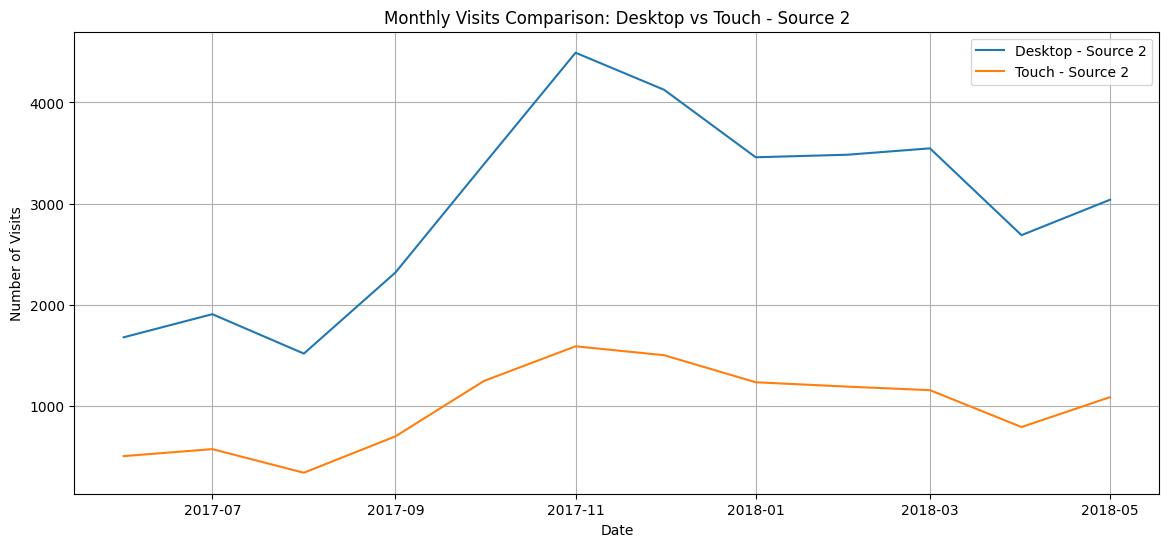

In [71]:
#Combine both graphs into one for a better comparison from one to the other
plt.figure(figsize=(14, 6))
plt.plot(visits_subset_desktop['month'], visits_subset_desktop['Visits'], label='Desktop - Source 2')
plt.plot(visits_subset_touch['month'], visits_subset_touch['Visits'], label='Touch - Source 2')
plt.title('Monthly Visits Comparison: Desktop vs Touch - Source 2')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.grid(True)
plt.show()

Comparing desktop to touch, the difference in purchases made per day are very noticeable as touch only meets with desktop at one point and its only due to desktop not making enough sales instead of touch sales increasing.

# Conclusions

If we take a look at the following

In [72]:
december_costs = costs[costs['dt'].dt.month == 12]

total_december_costs = december_costs['costs'].sum()

print("Total advertising costs in December:", total_december_costs)

Total advertising costs in December: 38315.35


In [73]:
december_orders = orders[orders['Buy Ts'].dt.month == 12]

total_december_revenue = december_orders['Revenue'].sum()

print("Total revenue in December:", total_december_revenue)

Total revenue in December: 36388.6


In [74]:
total_december_costs = 36388.6
total_december_revenue = 38315.35

profit_margin = 0.10

desired_revenue = total_december_revenue * (1 + profit_margin)

roi = (total_december_revenue - total_december_costs) / total_december_costs

require_investment = desired_revenue / (1 + roi)

print(require_investment)


40027.46


1. When to invest

According to our calculations, in order to make a profit of only 10% on the month of december. We need ot invest a total of $40027.46 as this is our most profitable month time of the year, this could easily happen. 

Althought touch and desktop make the company, desktop is the most profitable one. In this case, targeting users on desktop would be a better idea to increase sales.

During the month of december we have a big spike in purchases. Which could be a sale or special yandex was running since christmas was coming soon. Therefor during this month more promotions or more creative ways of advertising should be published and pushed out to the public.